In [ ]:
pip install scikeras

In [25]:
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from google.colab import drive
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report, confusion_matrix

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/CustomerChurn_dataset.csv')

In [ ]:
df

In [ ]:
pd.set_option('display.max_rows', None)

# Display the DataFrame
display(df)


Output hidden; open in https://colab.research.google.com to view.

FILLING IN THE MISSING VALUES

In [ ]:
numeric_columns = df.select_dtypes(include = [np.number]).columns
non_numeric_columns = df.select_dtypes(exclude = [np.number]).columns

numeric_columns_imputer = SimpleImputer(strategy = 'median')
non_numeric_columns_imputer = SimpleImputer(strategy = 'most_frequent')

df[numeric_columns] = numeric_columns_imputer.fit_transform(df[numeric_columns])
df[non_numeric_columns] = non_numeric_columns_imputer.fit_transform(df[non_numeric_columns])

ENCODING

In [ ]:
columns_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
# Concatenate the numeric columns and the encoded categorical columns
df = pd.concat([df[numeric_columns], df[columns_to_encode]], axis=1)

# Print the DataFrame
print(df)

      SeniorCitizen  tenure  MonthlyCharges  gender  Partner  Dependents  \
0               0.0     1.0           29.85       0        1           0   
1               0.0    34.0           56.95       1        0           0   
2               0.0     2.0           53.85       1        0           0   
3               0.0    45.0           42.30       1        0           0   
4               0.0     2.0           70.70       0        0           0   
5               0.0     8.0           99.65       0        0           0   
6               0.0    22.0           89.10       1        0           1   
7               0.0    10.0           29.75       0        0           0   
8               0.0    28.0          104.80       0        1           0   
9               0.0    62.0           56.15       1        0           1   
10              0.0    13.0           49.95       1        1           1   
11              0.0    16.0           18.95       1        0           0   
12          

EXTRACTING RELEVANT FEATURES THAT RELATE TO CHURNING

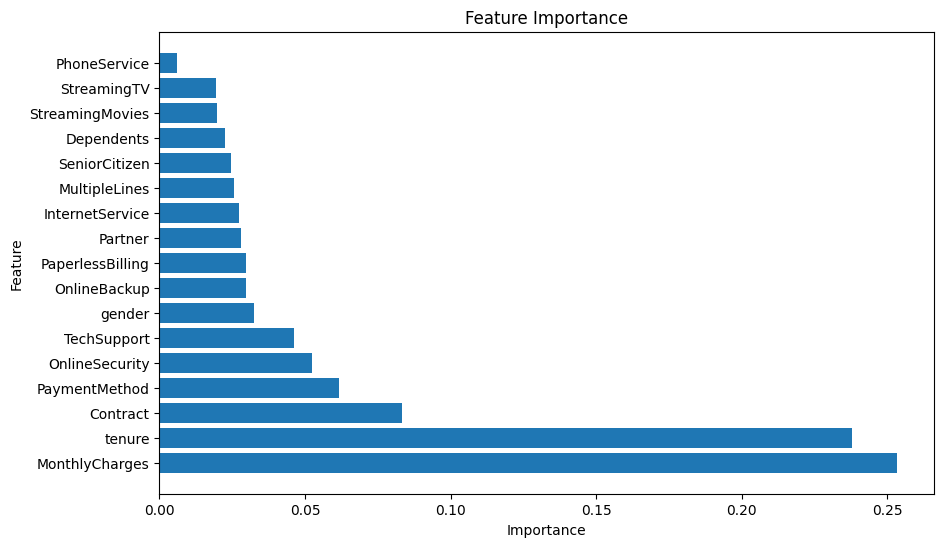

In [ ]:
target_column = 'Churn'


X = df.drop(target_column, axis=1)
y = df[target_column]


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_classifier.fit(X, y)


feature_importances = rf_classifier.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

USING EDA TO FIGURE OUT THE CUSTOMER PROFILES WHO ARE MOST LIKELY TO CHURN

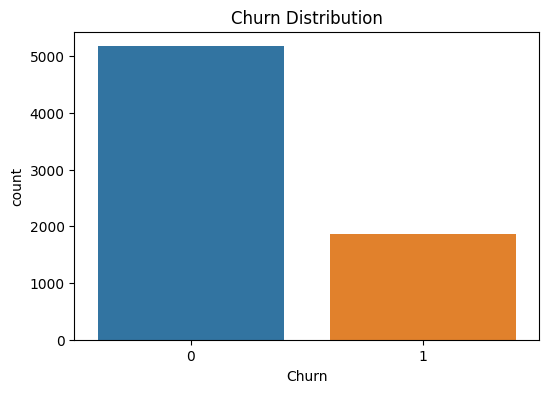

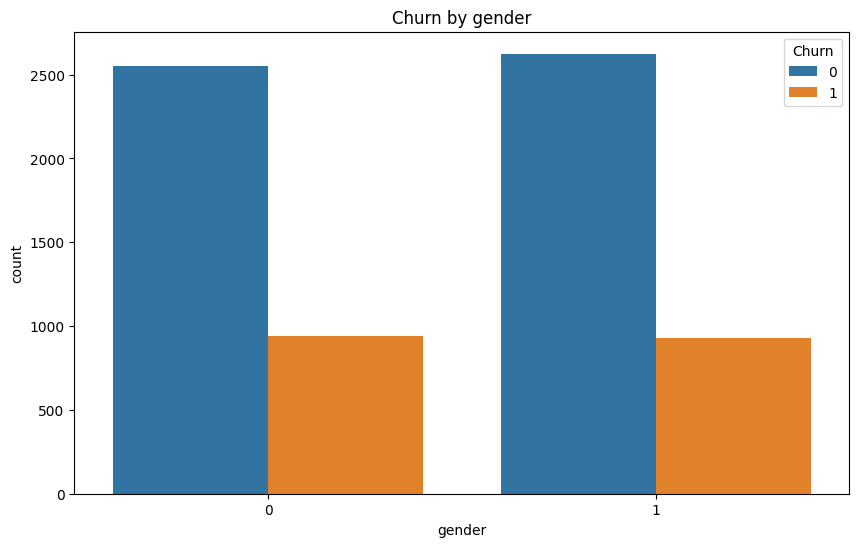

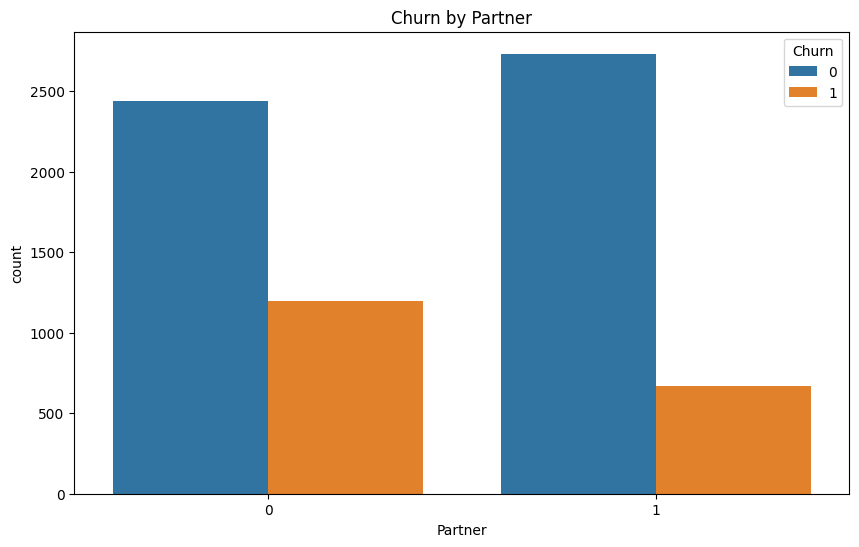

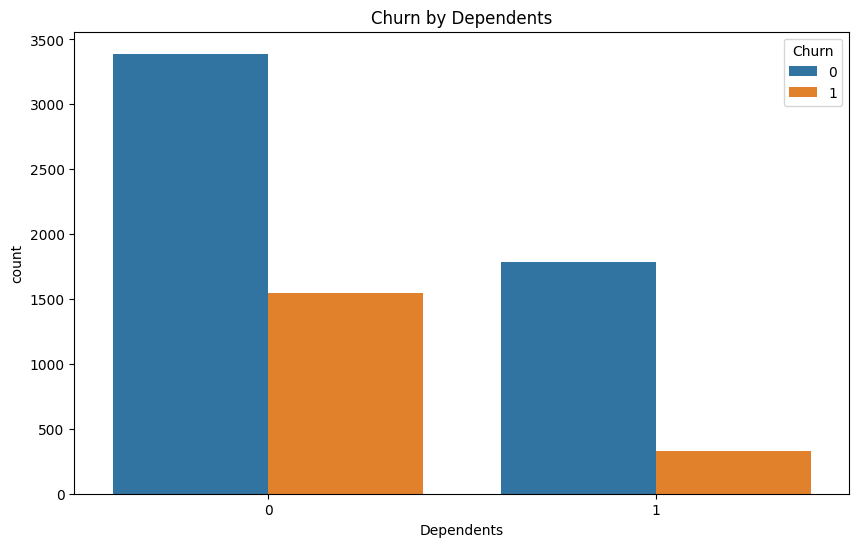

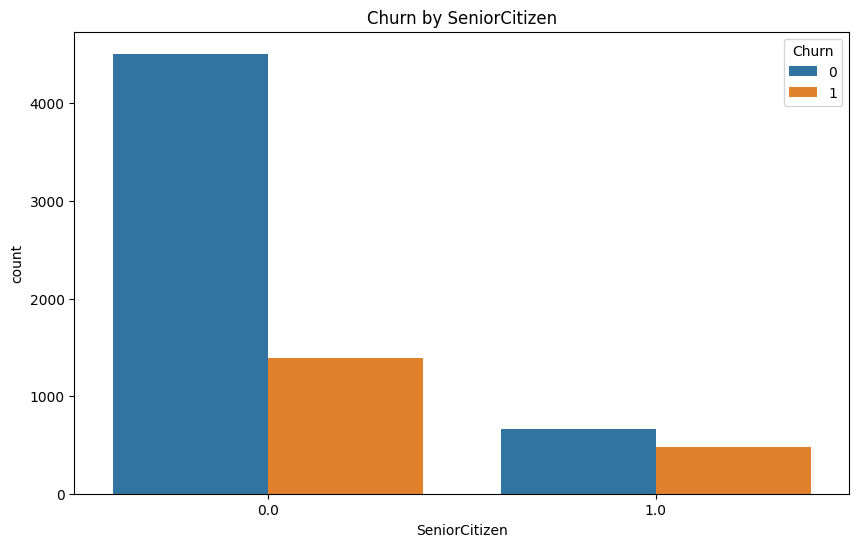

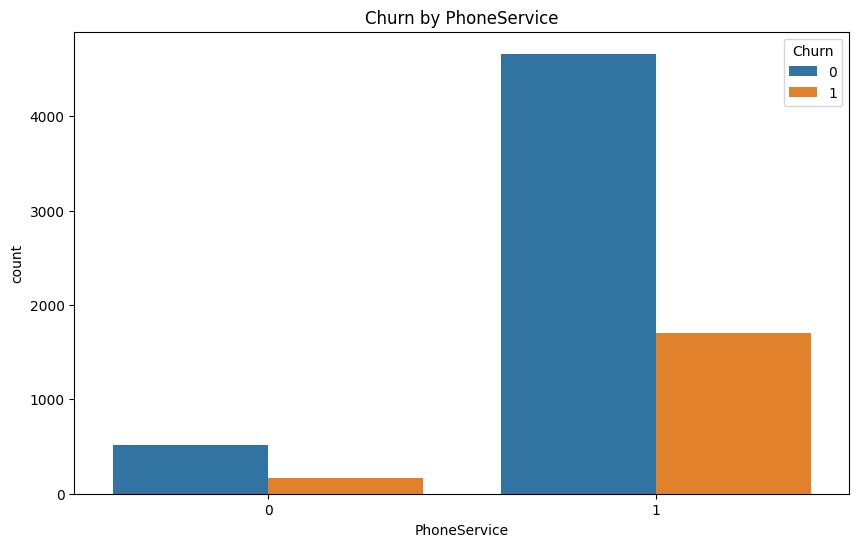

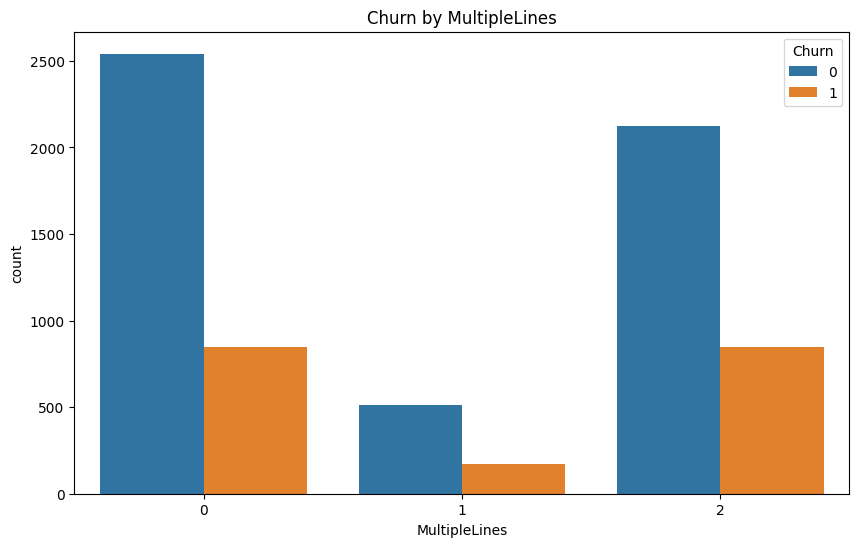

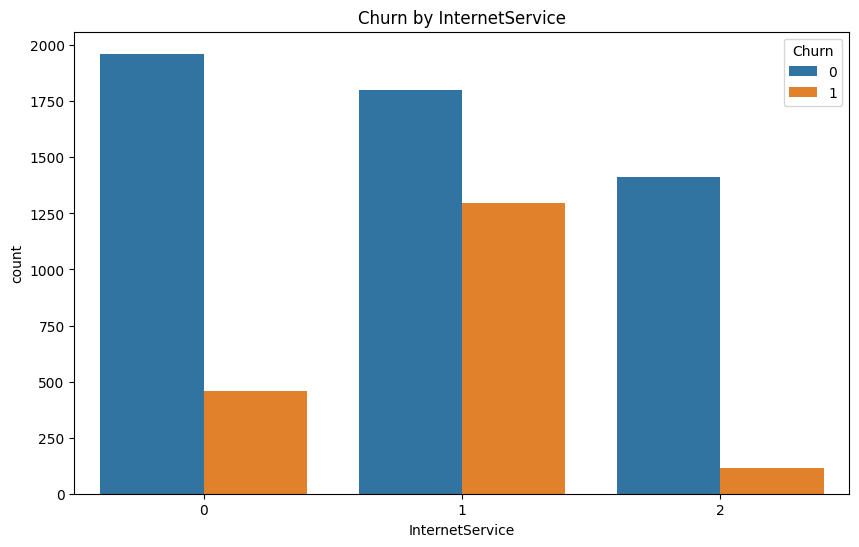

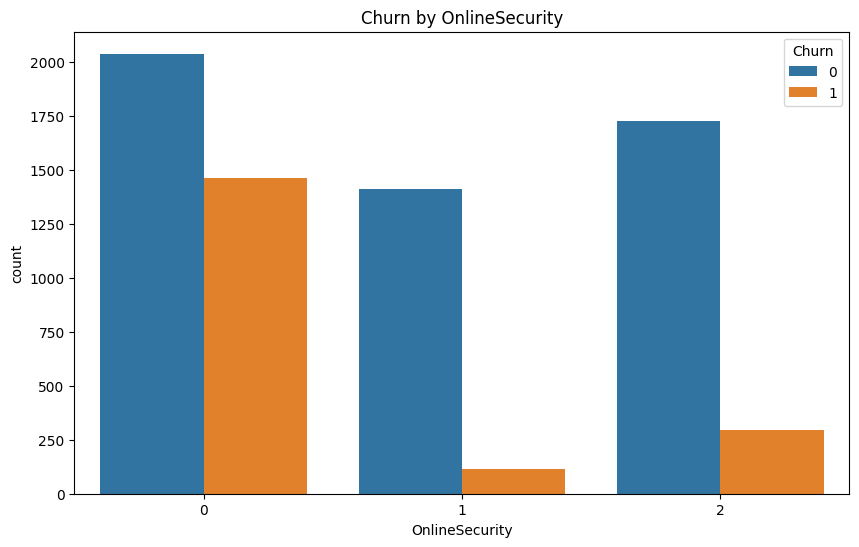

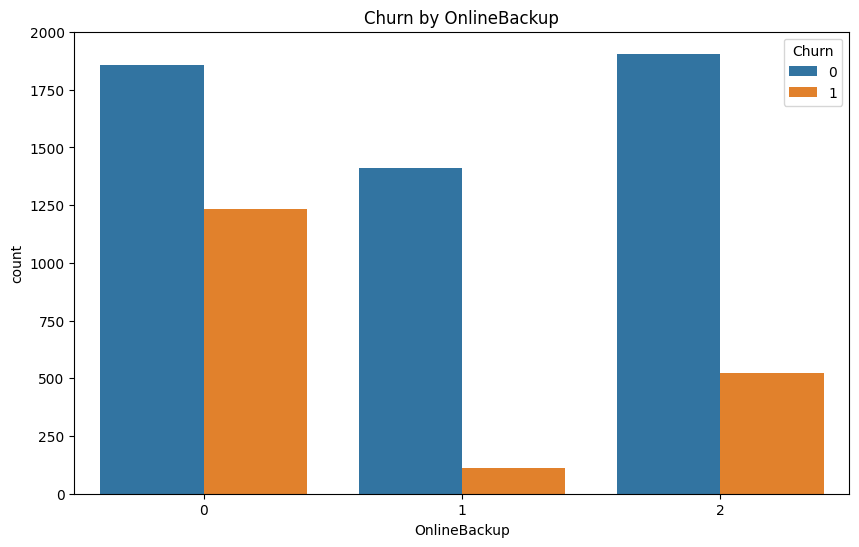

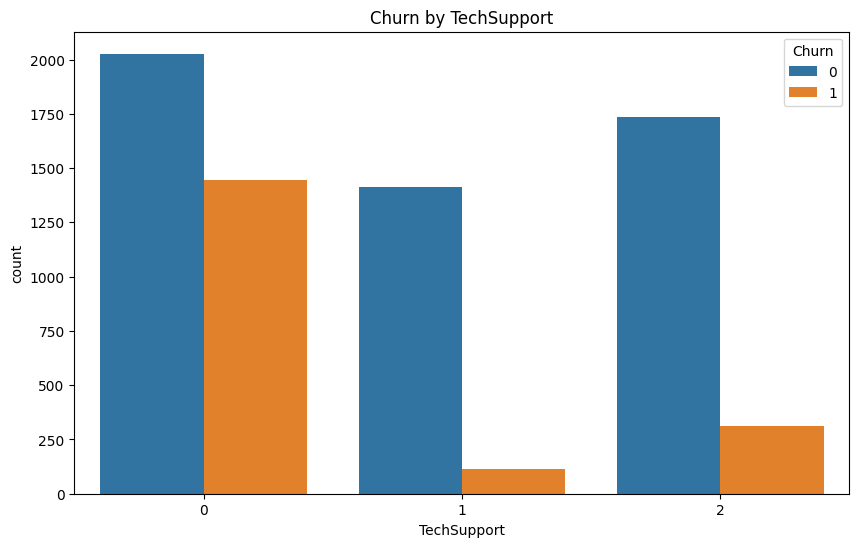

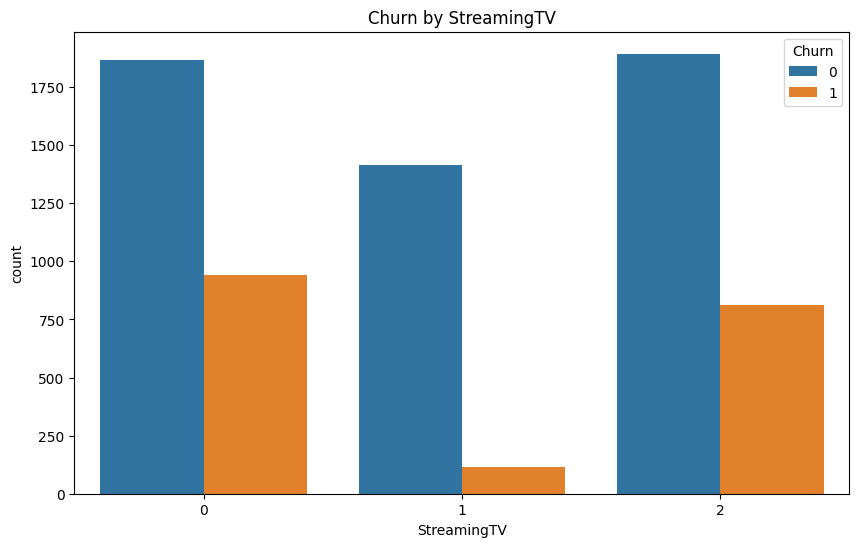

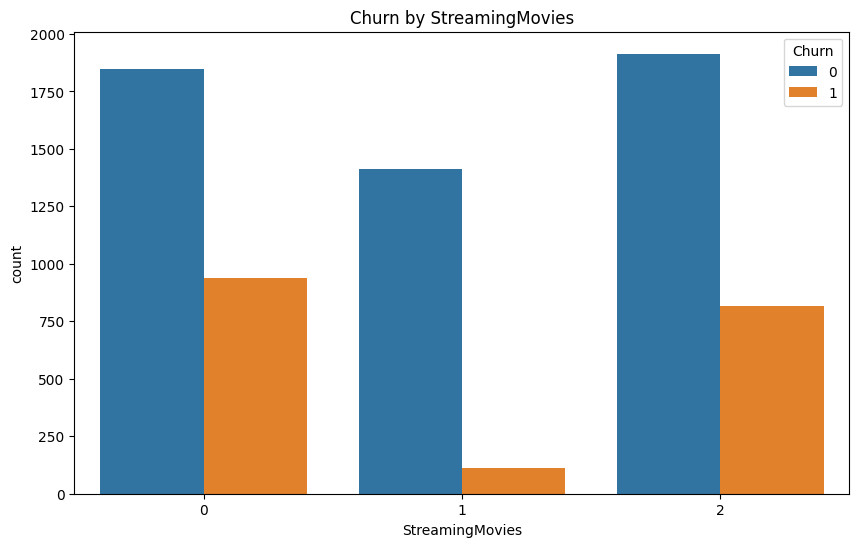

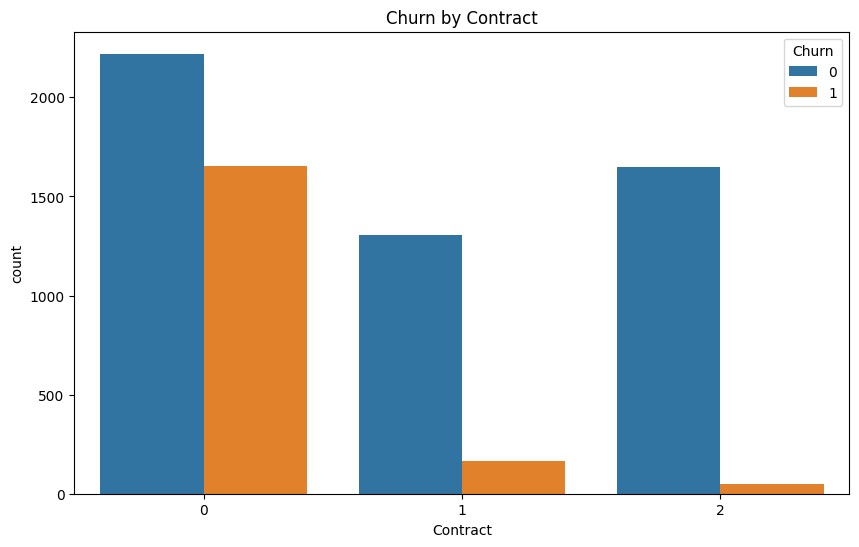

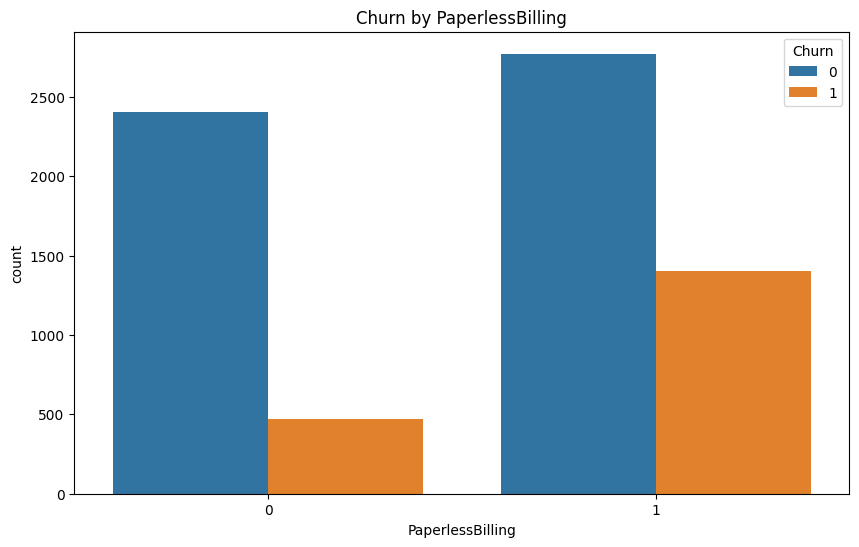

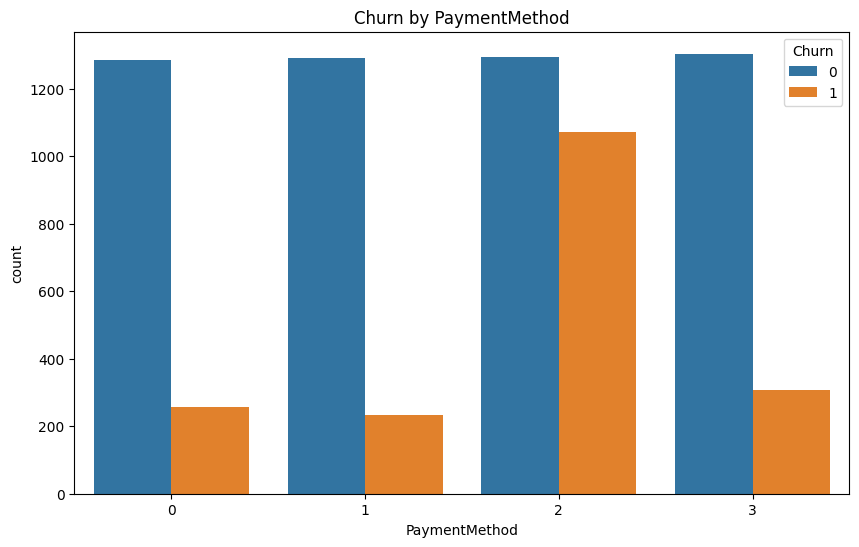

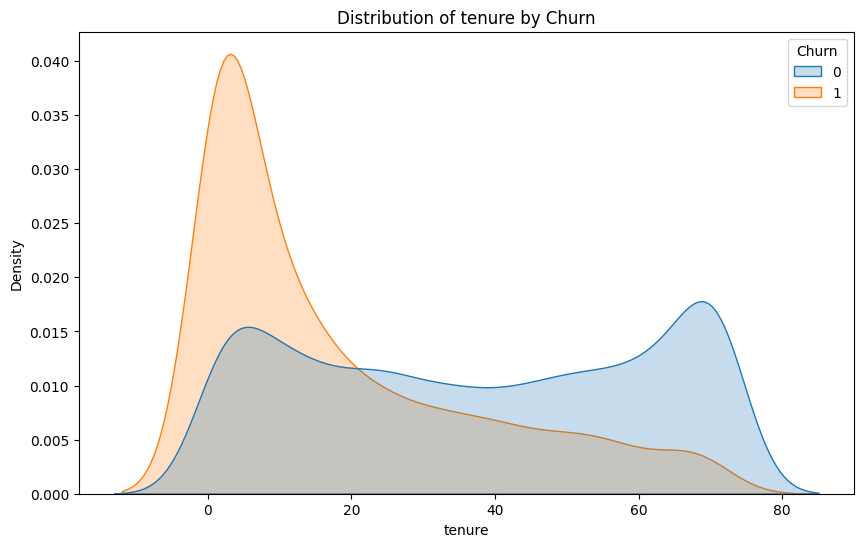

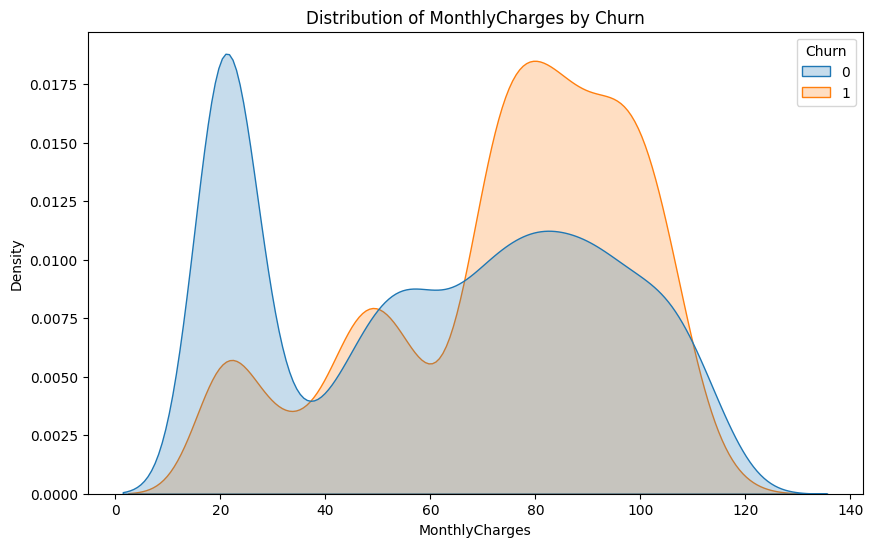

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Exploring the relationship between categorical variables and churn
categorical_columns = ['gender', 'Partner', 'Dependents', 'SeniorCitizen', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Churn', data=df)
    plt.title(f'Churn by {column}')
    plt.show()

# Expliong the relationship between numeric variables and churn
numeric_columns = ['tenure', 'MonthlyCharges']

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=column, hue='Churn', fill=True, common_norm=False)
    plt.title(f'Distribution of {column} by Churn')
    plt.show()

SELECTING FEATURES

In [ ]:

X = df.drop('Churn', axis=1)
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

model = RandomForestClassifier(n_estimators=100, random_state=42)

# RFECV object
rfecv = RFECV(estimator=model, step=1, cv=3, scoring='accuracy')

rfecv.fit(X_train, y_train)

# selected features
selected_features = X_train.columns[rfecv.support_]

In [ ]:
optimal_num_features = rfecv.n_features_
support_mask = rfecv.support_
selected_features = X.columns[support_mask]

In [ ]:
selected_features

In [ ]:
df = df.drop(['PhoneService','StreamingTV','StreamingMovies','Dependents','SeniorCitizen'],axis=1)
df

Output hidden; open in https://colab.research.google.com to view.

TRAINING

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score



target = df['Churn']


selected_features = df.drop('Churn', axis=1)


X = selected_features
y = target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


mlp = MLPClassifier(max_iter=100)


param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu'],
    'alpha': [0.0001, 0.001, 0.01],
}


grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)


grid_search.fit(X_train_scaled, y_train)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


y_pred = grid_search.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {roc_auc:.4f}")


Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
Accuracy: 0.8148
AUC Score: 0.7333


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
import pickle

In [27]:
pickle.dump(grid_search, open('/content/drive/My Drive/Colab Notebooks/FinalAssignment3.pkl', 'wb'))

In [28]:
model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/FinalAssignment3.pkl', 'rb'))